In [1]:
# imports
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
from numpy import linalg as LA
from scipy.fftpack import dct
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dist(img1, img2):
#     n1 = np.array(img1)
#     n2 = np.array(img2)
#     res = np.sum(np.absolute(n2-n1))
    res = 0
    for i in range(len(img1)):
        res += abs(int(img1[i]) - int(img2[i]))
    return res;

In [3]:
#initialization
def load_pic():
    class_count = 40
    image_count = 10
    imgs = []
    for i in range(class_count):
        imgs.append([])
        for j in range(image_count):
            address = "data/s" + str(i+1) + "/" + str(j+1) + ".pgm"
            imgs[i].append(mpimg.imread(address))
    return imgs

In [4]:
#set test, train

def test_train(imgs, count):
    train = []
    test = []
    for i in imgs:
        train.append(i[:count])
        test.append(i[count:])
    return test, train

In [5]:
def scale(img, mult):
    res = []
    h = len(img)
    w = len(img[0])
    h_count = int(h/mult)
    w_count = int(w/mult)
    for i in range(h_count):
        for j in range (int(w_count)):
            res.append(0)
            value = 0
            for q in range(mult):
                for p in range(mult):
                    value += img[i*mult+q][j*mult+p];
            value = value / mult*mult;
            res.append(value)
    
    for i in range(w_count*h_count):
        res[i] = res[i]/mult/mult
        
    return res

In [6]:
def random_list(count,img):
    h = len(img)
    w = len(img[0])
    res = []
    for i in range(count):
        r = int(random.random()*(h*w-1))
        elem = []
        elem.append(int(r/w))
        elem.append(r%w)
        res.append(elem)
    return res

In [7]:
def random_img(img, rand_list):
    res = []
    for i in rand_list:
        res.append(img[i[0]][i[1]])
    return res

In [8]:
def fft(img, size):
    res = []
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    for i in range(int(len(fshift)/2-size[0]), int(len(fshift)/2+size[0])):
        for j in range(int(len(fshift[0])/2-size[1]), int(len(fshift[0])/2+size[1])):
            res.append(fshift[i][j])
    return res;

In [9]:
def dist_complex(img1, img2):
    res = 0
    for i in range(len(img1)):
        res += abs(img1[i] - img2[i])
    return res;

In [10]:
  def dct2(img2, size):
    img = np.array(img2)
    m = dct(dct(img.T, norm='ortho').T, norm='ortho')
    res = []
    for i in range(size[0]):
        for j in range(size[1]):
            res.append(m[i][j])
    return res 

In [11]:
def hist(img, count):
    res = []
    for i in range(count):
        res.append(0)
    for i in img:
        for j in i:
            res[int((j/255)*count)] += 1
    return res;

In [12]:
def grad(img, W, S):
    res = []
    for i in range(S,int((len(img)-W)/S)):
        value = 0
        for j in range(W*len(img[0])):
            id_h = int(i*S+j/(len(img[0])))
            id_w = int(j%(len(img[0])))
            value += abs(img[id_h][id_w] - img[id_h-S][id_w])
        res.append(value)
    return res

In [13]:
def vote(result, class_count):
    voted = []
    for i in range (len(result[0])):
        value = [0]*class_count
        for j in result:
            value[j[i]] += 1
        max_id = 0
        max_value = value[0]
        for i in range(len(value)):
            if (value[i] > value[max_id]):
                max_id = i
                max_value = value[i]
        voted.append(max_id)
    return voted

In [14]:
def fr(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
#         res_list.append([])
        for j in range(len(test[0])):
            i_id = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append(i_id)
    print(res/(10-count_to_load)/40)
    return res_list
            
def fr_pic(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
        for j in range(len(test[0])):
            i_id = 0
            i_num = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_num = p
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append([i_id, i_num])
    return res_list

## Initialization

In [64]:
imgs = load_pic()
image_count = 10
class_count = 40
# count_to_load = 5
# class_count = 40
test, train = test_train(imgs, count_to_load)
result = []
for i in range(10):
    result.append([])
    for j in range(6):
        result[i].append([])

In [65]:
imgs_scaled = []
mult = 2
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
        imgs_scaled[i].append(scale(imgs[i][j], mult))

In [66]:
# test scale for params
# for mult in [2,3,4,5,6,7]:
#     imgs_scaled = []
#     #count = 32
#     for i in range(class_count):
#         imgs_scaled.append([])
#         for j in range(image_count):
#             imgs_scaled[i].append(scale(imgs[i][j], mult))
#     count_to_load = 1
#     test, train = test_train(imgs_scaled, count_to_load)
#     fr(test, train)

In [67]:
imgs_random = []
count = 600
rand_list = random_list(count, imgs[0][0])
for i in range(class_count):
    imgs_random.append([])
    for j in range(image_count):
        imgs_random[i].append(random_img(imgs[i][j], rand_list))

In [68]:
# test random for params
# for count in [500,600,700,800,900,1000]:
#     rand_list = random_list(count, imgs[0][0])
#     imgs_random = []
#     #count = 32
#     for i in range(class_count):
#         imgs_random.append([])
#         for j in range(image_count):
#             imgs_random[i].append(random_img(imgs[i][j], rand_list))
#     count_to_load = 1
#     test, train = test_train(imgs_random, count_to_load)
#     fr(test, train)

In [69]:
imgs_fft = []
size = [5,5]
for i in range(class_count):
    imgs_fft.append([])
    for j in range(image_count):
        imgs_fft[i].append(fft(imgs[i][j], size))

In [70]:
# params fft
# for size in [[2,2],[3,3],[4,4],[5,5],[6,6]]:
#     imgs_fft = []
#     for i in range(class_count):
#         imgs_fft.append([])
#         for j in range(image_count):
#             imgs_fft[i].append(fft(imgs[i][j], size))
#     count_to_load = 1
#     test, train = test_train(imgs_fft, count_to_load)
#     fr(test, train)

In [71]:
imgs_hist = []
count = 32
for i in range(class_count):
    imgs_hist.append([])
    for j in range(image_count):
        imgs_hist[i].append(hist(imgs[i][j], count))

In [72]:
# test hist for params
# for count in [10,15,25,30,35,40]:
#     imgs_hist = []
#     #count = 32
#     for i in range(class_count):
#         imgs_hist.append([])
#         for j in range(image_count):
#             imgs_hist[i].append(hist(imgs[i][j], count))
#     count_to_load = 1
#     test, train = test_train(imgs_hist, count_to_load)
#     fr(test, train)

In [73]:
imgs_grad = []
W = 13
S = 3
for i in range(class_count):
    imgs_grad.append([])
    for j in range(image_count):
        imgs_grad[i].append(grad(imgs[i][j], W, S))

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [74]:
# for W in [4,7,10,13]:
#     for S in [2,3,4,6]:
#         imgs_grad = []
#         #count = 32
#         for i in range(class_count):
#             imgs_grad.append([])
#             for j in range(image_count):
#                 imgs_grad[i].append(grad(imgs[i][j], W, S))
#         count_to_load = 1
#         test, train = test_train(imgs_grad, count_to_load)
#         fr(test, train)

In [102]:
imgs_cos = []
size = [6, 6]
for i in range(class_count):
    imgs_cos.append([])
    for j in range(image_count):
        imgs_cos[i].append(dct2(imgs[i][j], size))

In [101]:
# test dct for params
# for size in [[3,3],[4,4],[5,5],[6,6],[7,7],[8,8]]:
#     imgs_cos = []
#     #count = 32
#     for i in range(class_count):
#         imgs_cos.append([])
#         for j in range(image_count):
#             imgs_cos[i].append(dct2(imgs[i][j], size))
#     count_to_load = 1
#     test, train = test_train(imgs_cos, count_to_load)
#     fr(test, train)

0.6027777777777777
0.6722222222222223
0.725
0.7305555555555555
0.7194444444444444
0.7138888888888889


## Calculations

In [77]:
test_count = 10
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_scaled, count_to_load)
    result[i-1][0] = (fr(test, train))

0.675
0.79375
0.8178571428571428
0.8625
0.9199999999999999
0.975
0.9666666666666666
0.9625
0.925


In [78]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_random, count_to_load)
    result[i-1][1] = (fr(test, train))

0.711111111111111
0.8375
0.8642857142857142
0.9041666666666666
0.9400000000000001
0.98125
0.975
0.975
0.95


In [79]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_fft, count_to_load)
    result[i-1][2] = (fr(test, train))

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


0.675
0.78125
0.8428571428571429
0.8791666666666667
0.8949999999999999
0.94375
0.95
0.9375
0.925


In [80]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_hist, count_to_load)
    result[i-1][3] = (fr(test, train))

0.6083333333333333
0.68125
0.6928571428571428
0.7916666666666667
0.905
0.98125
0.9833333333333334
0.975
1.0


In [81]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_grad, count_to_load)
    result[i-1][4] = (fr(test, train))

0.638888888888889
0.68125
0.6678571428571429
0.7
0.755
0.8125
0.8666666666666666
0.85
0.825


In [82]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_cos, count_to_load)
    result[i-1][5] = (fr(test, train))

0.7305555555555555
0.8375
0.8535714285714286
0.9
0.9099999999999999
0.96875
0.9583333333333334
0.9625
0.975


## Data result

In [83]:
graph_data = [[]]
picture_data = [[],[],[],[],[],[],[]]

In [84]:
# res = result[0][0]
for c in range(1,test_count):
    res = result[c-1]
# print(res)
    voted = vote(res, class_count)
    right = []
    count_to_load = c
    for i in range(40):
        for j in range(10-count_to_load):
            right.append(i)
#     print(right)
    ans = 0
    t = voted
    res = 0
    for i in range(len(t)):
        if (t[i] == right[i]):
            ans += 1
    print(ans/len(t))
    graph_data[0].append(ans/len(t))
    if (c == 6):
        picture_data[0]=voted
#         print(1)
#     print(len(t))

0.7472222222222222
0.871875
0.9107142857142857
0.9333333333333333
0.95
0.99375
0.975
0.975
0.95


In [85]:

for method_num in range(6):
    graph_data.append([])    
    for c in range(1,test_count):
        res = [result[c-1][method_num]]
# print(res)
        voted = vote(res, class_count)
        right = []
        count_to_load = c
        for i in range(40):
            for j in range(10-count_to_load):
                right.append(i)
#     print(right)
        ans = 0
        t = voted
        res = 0
        for i in range(len(t)):
            if (t[i] == right[i]):
                ans += 1
        print(method_num, c, ans/len(t))
        graph_data[method_num+1].append(ans/len(t))
        
        if (c == 6):
            picture_data[method_num+1]=voted

0 1 0.675
0 2 0.79375
0 3 0.8178571428571428
0 4 0.8625
0 5 0.92
0 6 0.975
0 7 0.9666666666666667
0 8 0.9625
0 9 0.925
1 1 0.7111111111111111
1 2 0.8375
1 3 0.8642857142857143
1 4 0.9041666666666667
1 5 0.94
1 6 0.98125
1 7 0.975
1 8 0.975
1 9 0.95
2 1 0.675
2 2 0.78125
2 3 0.8428571428571429
2 4 0.8791666666666667
2 5 0.895
2 6 0.94375
2 7 0.95
2 8 0.9375
2 9 0.925
3 1 0.6083333333333333
3 2 0.68125
3 3 0.6928571428571428
3 4 0.7916666666666666
3 5 0.905
3 6 0.98125
3 7 0.9833333333333333
3 8 0.975
3 9 1.0
4 1 0.6388888888888888
4 2 0.68125
4 3 0.6678571428571428
4 4 0.7
4 5 0.755
4 6 0.8125
4 7 0.8666666666666667
4 8 0.85
4 9 0.825
5 1 0.7305555555555555
5 2 0.8375
5 3 0.8535714285714285
5 4 0.9
5 5 0.91
5 6 0.96875
5 7 0.9583333333333334
5 8 0.9625
5 9 0.975


In [86]:
graph_data


[[0.7472222222222222,
  0.871875,
  0.9107142857142857,
  0.9333333333333333,
  0.95,
  0.99375,
  0.975,
  0.975,
  0.95],
 [0.675,
  0.79375,
  0.8178571428571428,
  0.8625,
  0.92,
  0.975,
  0.9666666666666667,
  0.9625,
  0.925],
 [0.7111111111111111,
  0.8375,
  0.8642857142857143,
  0.9041666666666667,
  0.94,
  0.98125,
  0.975,
  0.975,
  0.95],
 [0.675,
  0.78125,
  0.8428571428571429,
  0.8791666666666667,
  0.895,
  0.94375,
  0.95,
  0.9375,
  0.925],
 [0.6083333333333333,
  0.68125,
  0.6928571428571428,
  0.7916666666666666,
  0.905,
  0.98125,
  0.9833333333333333,
  0.975,
  1.0],
 [0.6388888888888888,
  0.68125,
  0.6678571428571428,
  0.7,
  0.755,
  0.8125,
  0.8666666666666667,
  0.85,
  0.825],
 [0.7305555555555555,
  0.8375,
  0.8535714285714285,
  0.9,
  0.91,
  0.96875,
  0.9583333333333334,
  0.9625,
  0.975]]

In [87]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 200

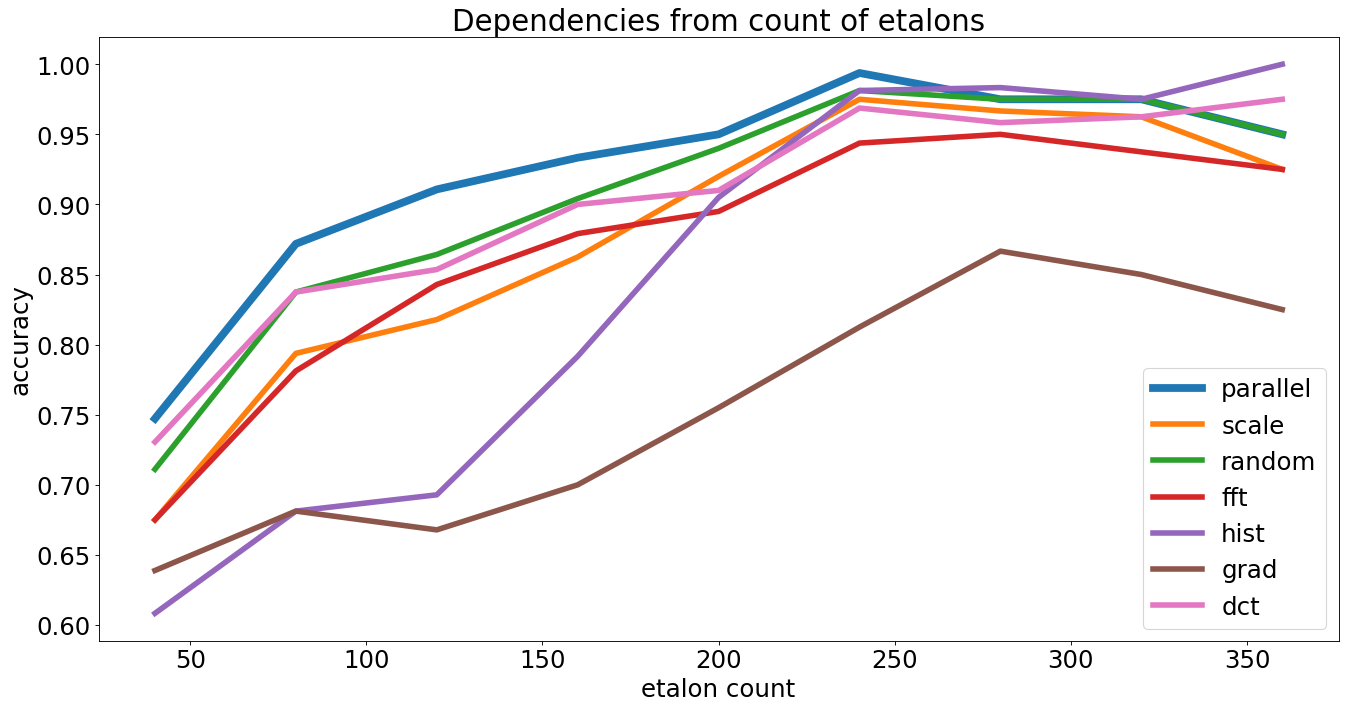

In [104]:
x = [40,80,120,160,200,240,280,320,360]
# x = [1,2,3,4,5,6,7,8,9]
plt.rcParams.update({'font.size': 22})
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(x,graph_data[0], label = "parallel", linewidth=7.0)
plt.plot(x,graph_data[1], label = "scale", linewidth=5.0)
plt.plot(x,graph_data[2], label = "random", linewidth=5.0)
plt.plot(x,graph_data[3], label = "fft", linewidth=5.0)
plt.plot(x,graph_data[4], label = "hist", linewidth=5.0)
plt.plot(x,graph_data[5], label = "grad", linewidth=5.0)
plt.plot(x,graph_data[6], label = "dct", linewidth=5.0)

plt.legend()   # легенда

In [89]:
picture_data = [[],[],[],[],[],[],[]]
for i in range(0,40):
    for j in range(6,10):
        picture_data[6].append([i,j])
count_to_load = 6

In [90]:
test, train = test_train(imgs_scaled, count_to_load)
picture_data[0] = (fr_pic(test, train))

test, train = test_train(imgs_random, count_to_load)
picture_data[1] = (fr_pic(test, train))
    
test, train = test_train(imgs_fft, count_to_load)
picture_data[2] = (fr_pic(test, train))
    
test, train = test_train(imgs_hist, count_to_load)
picture_data[3] = (fr_pic(test, train))
    
test, train = test_train(imgs_grad, count_to_load)
picture_data[4] = (fr_pic(test, train))

test, train = test_train(imgs_cos, count_to_load)
picture_data[5] = (fr_pic(test, train))
    
    

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [91]:
num = 0

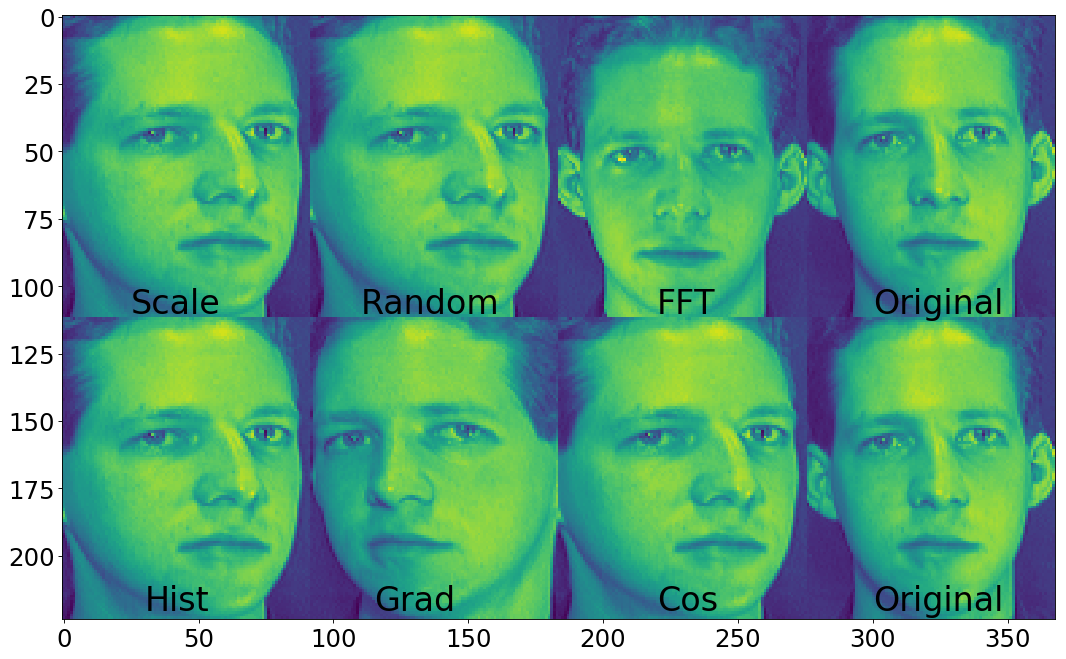

In [92]:

rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 80
num += 1

def get(a, b):
#     print(a,b)
    return imgs[picture_data[a][b][0]][picture_data[a][b][1]]

hor1 = np.concatenate((get(0,num), get(1,num), get(2,num), get(6,num)), axis=1)
hor2 = np.concatenate((get(3,num), get(4,num), get(5,num), get(6,num)), axis=1)
text(25, 110, "Scale", fontsize=30)
text(110, 110, "Random", fontsize=30)
text(220, 110, "FFT", fontsize=30)
text(300, 110, "Original", fontsize=30)
text(30, 220, "Hist", fontsize=30)
text(115, 220, "Grad", fontsize=30)
text(220, 220, "Cos", fontsize=30)
text(300, 220, "Original", fontsize=30)
final = np.concatenate((hor1, hor2), axis=0)
plt.imshow(final)

address = "res/num"+str(num)+".jpg"
mpimg.imsave(address, final)

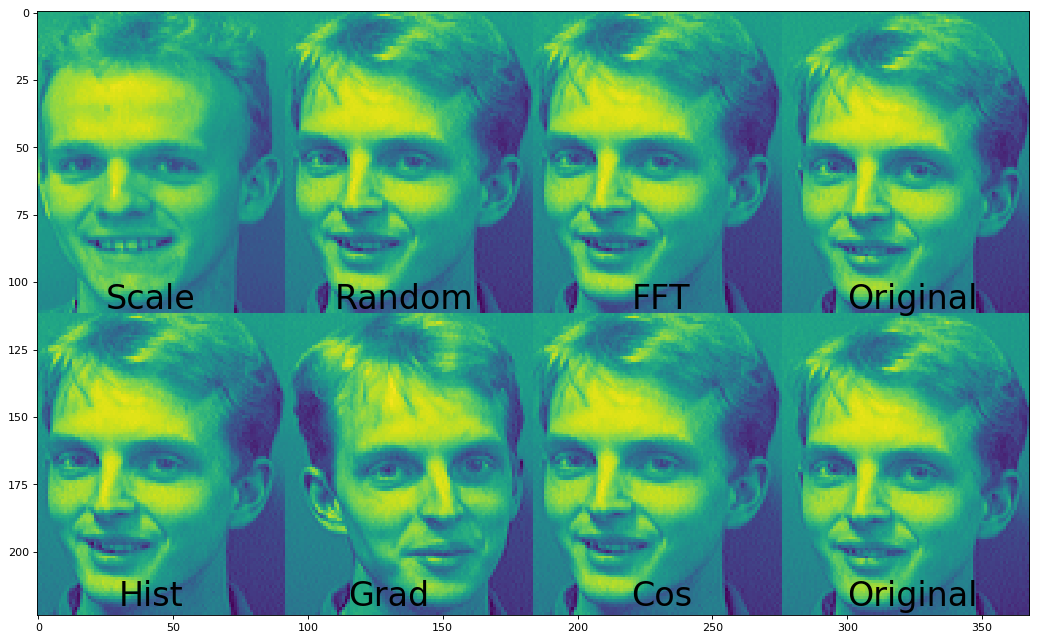

In [38]:
rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 80
# num = 0

def get(a, b):
    return imgs[picture_data[a][b][0]][picture_data[a][b][1]]

for num in range(len(picture_data[0])):
    plt.clf()
    hor1 = np.concatenate((get(0,num), get(1,num), get(2,num), get(6,num)), axis=1)
    hor2 = np.concatenate((get(3,num), get(4,num), get(5,num), get(6,num)), axis=1)
    text(25, 110, "Scale", fontsize=30)
    text(110, 110, "Random", fontsize=30)
    text(220, 110, "FFT", fontsize=30)
    text(300, 110, "Original", fontsize=30)
    text(30, 220, "Hist", fontsize=30)
    text(115, 220, "Grad", fontsize=30)
    text(220, 220, "Cos", fontsize=30)
    text(300, 220, "Original", fontsize=30)
    final = np.concatenate((hor1, hor2), axis=0)
    plt.imshow(final)

    plt.savefig('res/num'+str(num)+'.png')
#     address = "res/num"+str(num)+".jpg"
#     mpimg.imsave(address, final)